# **Bike Sharing Dataset: A Machine Learning Approach**
---
by @atthabrizi

**Table of contents:**
- Domain Knowledge and Problem Identification
- All about data
- Exploratory Data Analysis (EDA)
- Data Preparation
- Modeling
- Final Model Evaluation
- Conclusion and Recommendation
- Deployment

In [78]:
# importing basic modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Domain Knowledge and Problem Identification**

**Context**
***

Sistem berbagi sepeda adalah generasi baru dari penyewaan sepeda tradisional di mana seluruh proses dari keanggotaan, penyewaan, dan pengembalian sepeda telah menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari posisi tertentu dan mengembalikannya ke posisi lain. Saat ini, terdapat lebih dari 500 program berbagi sepeda di seluruh dunia yang terdiri dari lebih dari 500 ribu sepeda. Saat ini, ada minat besar dalam sistem-sistem ini karena peran pentingnya dalam masalah lalu lintas, lingkungan, dan kesehatan.

Selain aplikasi dunia nyata yang menarik dari sistem berbagi sepeda, karakteristik data yang dihasilkan oleh sistem-sistem ini membuat mereka menarik untuk penelitian. Berbeda dengan layanan transportasi lain seperti bus atau kereta bawah tanah, durasi perjalanan, posisi keberangkatan, dan posisi kedatangan secara eksplisit dicatat dalam sistem-sistem ini. Fitur ini mengubah sistem berbagi sepeda menjadi jaringan sensor virtual yang dapat digunakan untuk mendeteksi mobilitas di kota. Oleh karena itu, diharapkan bahwa sebagian besar peristiwa penting di kota dapat dideteksi melalui pemantauan data ini.

**Problem Statements**
***
Penggunaan sharing sepeda dengan jumlah pengguna yang sangat besar di ibu kota Amerika menimbulkan sebuah pertanyaan, bagaimana cara perusahaan mengelola proses operasi dari penyediaan sepeda ini dengan optimal secara keuangan? yaitu meminimalisir *cost* dan memaksimalkan *revenue*.

Salah satu cara untuk mencapai hal tersebut adalah  perusahaan harus memiliki kemampuan untuk membaca pasar yang akan dituju. Adanya sistem manajemen logistik yang baik akan membantu perusahaan untuk sebisa mungkin mengatur supply untuk bisa mendekati titik [*Market Equilibrium*](https://www.mindtools.com/arzv8lc/what-are-supply-and-demand-curves) pada kurva supply dan demand.

Baik atau tidaknya perusahaan membaca demand untuk mengatur supply akan menjadi pengaruh yang besar terhadap arus pendapatan dan penguranan perusahaan. Apabila perusahaan terlalu banyak mengatur supply dibawah demand, maka akan ada biaya operasional yang tidak efisien dan efektif, begitu pula sebaliknya apabila perusahaan tidak memenuhi supply disaat demand memiliki nilai tinggi, maka perusahaan akan kehilangan *opportunity cost* untuk mendapatkan revenue.




**Goals**
***
Tujuan utama dari dibangunnya algoritma ini adalah untuk membantu memberikan insight sebagai alternatif pengambilan keputusan manajerial supply sepeda kepada perusahaan penyedia jasa.




## **All About the Data**
---

Kumpulan data ini memberikan informasi dari Capital Bike Sharing system yang mencakupi penggunaan jasa Bike Rental pada wilayah Washington D.C. pada setiap jam dan hariannya, beserta detail tentang kondisi cuaca dan faktor musim selama waktu penggunaan tersebut. data yang digunakan mencakup rentang waktu dari bulan Januari 2011 hingga Desember 2012.

[Data source](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset)

In [79]:
# mengimport dataset
data = pd.read_csv('data_bike_sharing.csv', parse_dates=['dteday'])
df = pd.DataFrame(data)
df.head(5)

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


In [80]:
print(f" Starting date = {df.dteday.min()}, \n Ending date = {df.dteday.max()}")

 Starting date = 2011-01-01 00:00:00, 
 Ending date = 2012-12-31 00:00:00


Seperti yang ada diatas, dataset ini memiliki beberapa fitur yang tersedia.

| Feature      | Description                                               |
|--------------|-----------------------------------------------------------|
| dteday       | Date                                                      |
| season       | Season (1: winter, 2: spring, 3: summer, 4: fall)         |
| hr           | Hour (0 to 23)                                            |
| holiday      | Holiday or not                                            |
| temp         | Normalized temperature in Celsius                         |
| atemp        | Normalized feeling temperature in Celsius                 |
| hum          | Normalized humidity (divided into 100)                    |
| casual       | Count of casual users                                     |
| registered   | Count of registered users                                 |
| weathersit   | Weather situation. [Ref](https://docs.google.com/document/d/1mNMpg4t6n9pKAlA0Khiivfwuv21JZVQoZ9ygvX4BI34/edit)                                        |
| cnt          | Count of total rental bikes (casual + registered)         |


Fitur-fitur ini akan digunakan untuk melatih dan benjadi benchmark input dari model machine learning yang akan dibuat. Untuk mendapatkan algoritma dan hasil prediksi sebaik mungkin, fitur ini nantinya akan diolah (diubah, ditambah dan dikurangi) sesuai dengan karakteristik data dan juga model.

## **Exploratory Data Analysis**
---

In [81]:
mapcolumn = {'hum':'humidity', 'weathersit':'weather situation', 'holiday':'holiday', 'season':'season', 'atemp':'temperature (feels)', 'temp':'temperature', 'hr':'hour', 'casual':'casual Consumer', 'registered': 'Registered consumer'}
columns = ['hum', 'weathersit', 'season', 'atemp', 'temp', 'hr', 'casual', 'registered','holiday']
bar = ['weathersit', 'holiday', 'season', 'hr']
color = sns.color_palette("viridis", 11)
from statsmodels.api import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

### **Distriburtion Plot of Target**

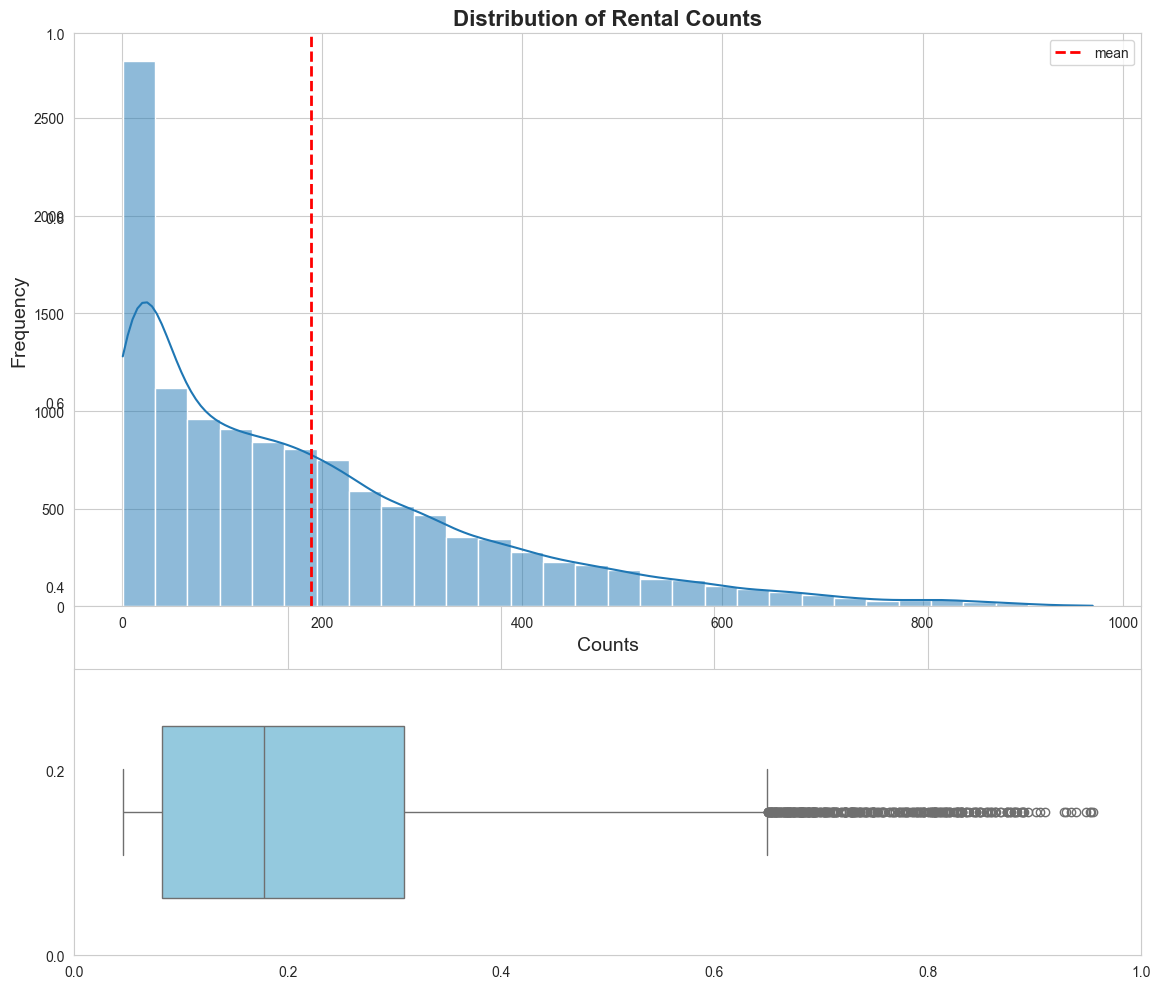

In [82]:
plt.figure(figsize=(12, 10))
plt.title('Distribution of Rental Counts', fontsize=16, fontweight='bold')
gs = plt.GridSpec(2, 1, height_ratios=[2, 1])
# 1
ax1 = plt.subplot(gs[0])
plt.subplot(2, 1, 1)
sns.histplot(df['cnt'], kde=True, bins=30)
plt.axvline(df['cnt'].mean(), color='red', linestyle='--', linewidth=2, label='mean')
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Counts', fontsize=14)
plt.legend()

# 2
ax2 = plt.subplot(gs[1])
plt.subplot(2, 1, 2)
sns.boxplot(x=df['cnt'], color='skyblue', width=0.6)
plt.xlabel('')
plt.xticks([])

plt.tight_layout()
plt.show()


Dari analisis grafik distribusi ini menunjukkan bahwa sebagian besar waktu, jumlah sepeda yang disewa relatif rendah, tetapi ada beberapa kejadian di mana jumlah sewa sepeda melonjak secara signifikan. 

Distribusi *positive-skewed* ini menggambarkan bahwa pada waktu tertentu karena adanya beberapa faktor jumlah penyewaan sepeda ini bisa mengalami kenaikan yang signifikan, hal ini membuka banyak kemungkinan untuk adanya kreatifitas dalam strategi marketing dan operasional.

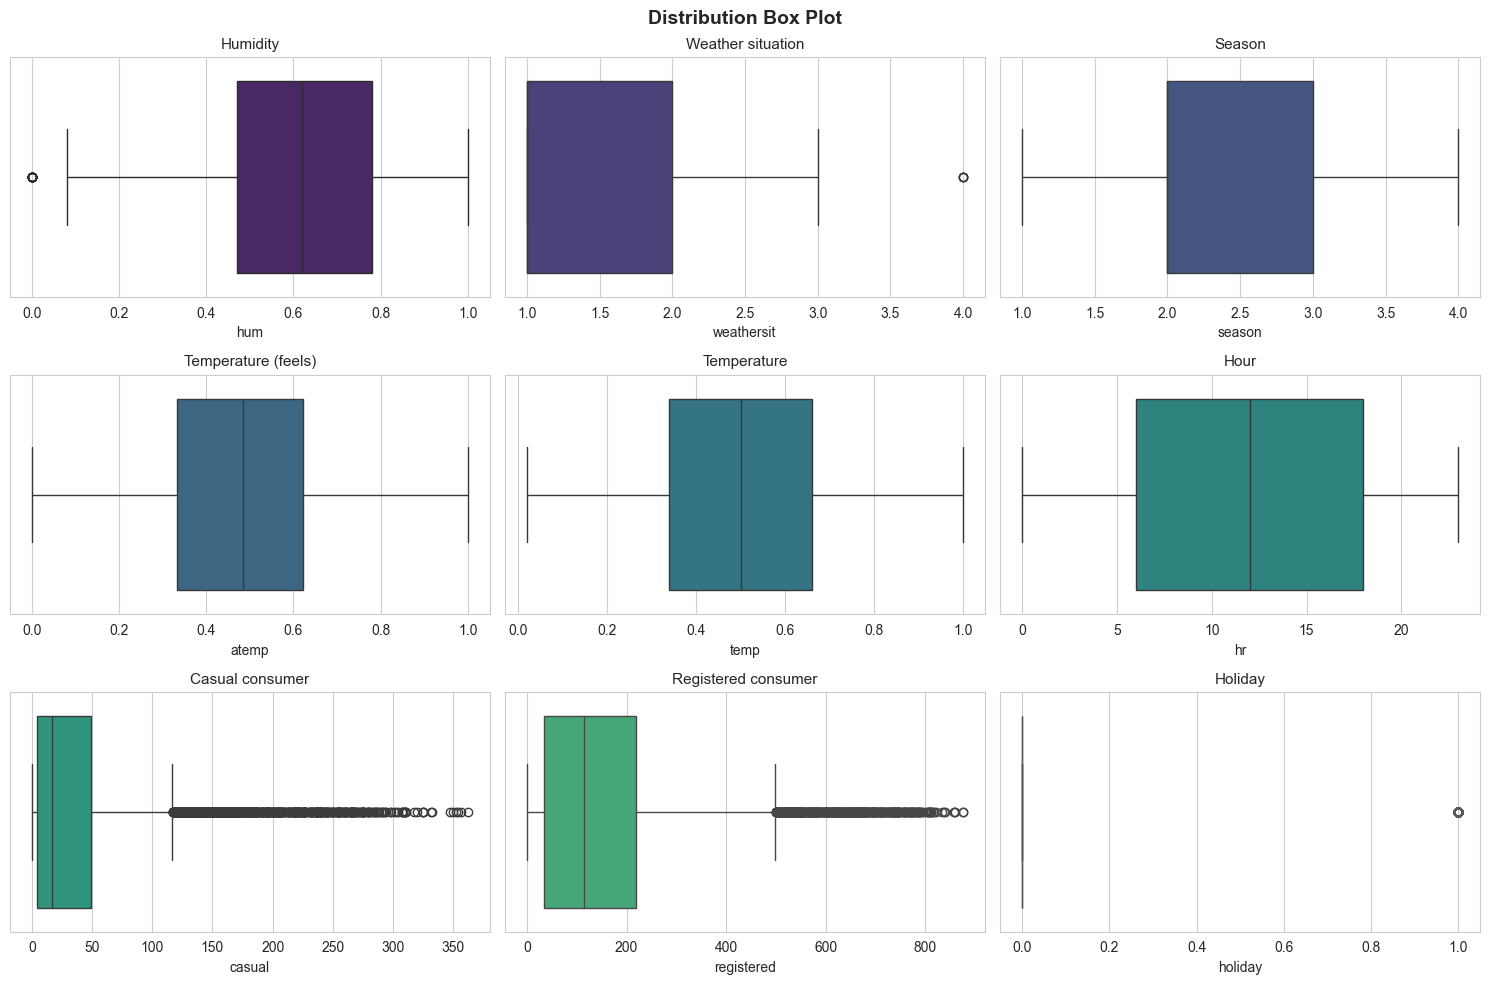

In [83]:
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
plt.suptitle('Distribution Box Plot', fontsize=14, fontweight='bold')
axs = axs.flatten()
for i, col in enumerate(columns):
    axs[i].set_title(f'{mapcolumn[col].capitalize()}', fontsize=11)
    sns.boxplot(data=df[col], ax=axs[i], orient='h', color=color[i])
plt.tight_layout()
plt.show()

Untuk distribusi pada fitur-fitur dari dataset, didapatkan bahwa pada fitur tertentu, seperti `season`, `atemp` ,`temp` dan `hr`  memiliki distribusi yang normal, dan pada fitur yang tidak memiliki distribusi normal kebanyakan memiliki distribusi yang sama seperti target dengan distribusi *positive-skew* dan memiliki sejumlah outliers. 

### **Correlation and Linearity of Features**

Selanjutnya akan dilakukan analisis terhadap korelasi dari fitur terhadap target. 

Untuk fitur yang bersifat kontinu akan divisualisasikan menggunakan regression plot dan untuk fitur diskrit akan enggunakan countplot.

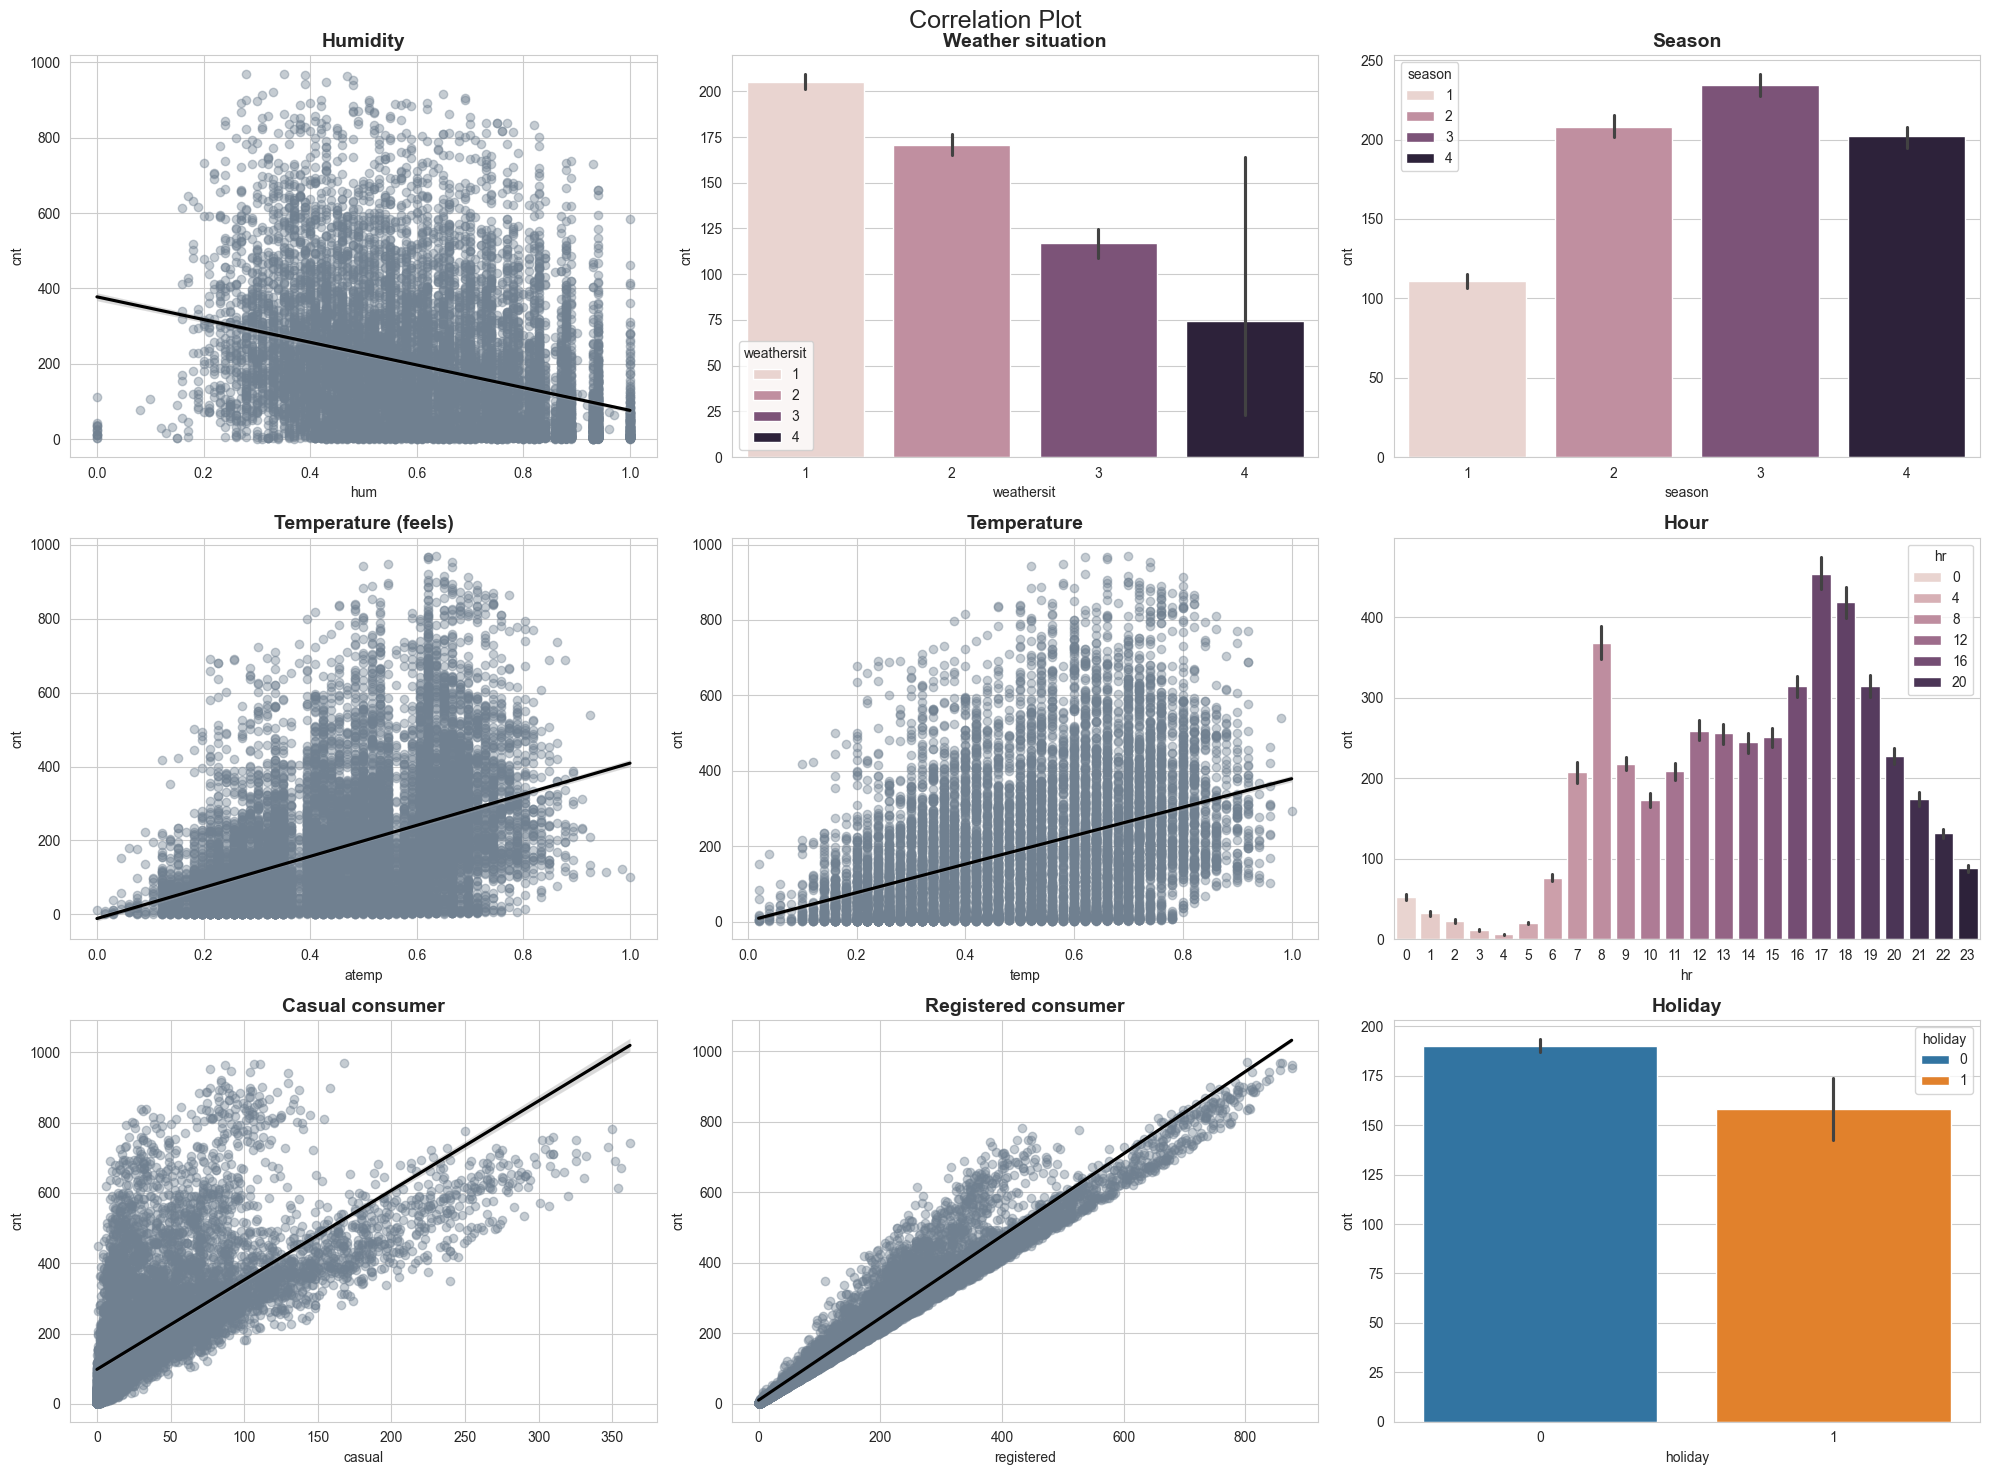

In [84]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
plt.suptitle('Correlation Plot', fontsize=18)
sns.set_style('whitegrid')
axes = axes.flatten()

for idx, col in enumerate(columns):
    if col in bar:
        sns.barplot(data=df, x=col, y='cnt',hue=col, ax=axes[idx])
        axes[idx].set_title(f'{mapcolumn[col].capitalize()}', fontsize=14, fontweight='bold')
    else:
        sns.regplot(data=df, x=col, y='cnt', ax=axes[idx], scatter_kws={'color': 'slategray', 'alpha':0.4}, line_kws={'color': 'black'})
        axes[idx].set_title(f'{mapcolumn[col].capitalize()}', fontsize=14, fontweight='bold')
    
plt.tight_layout()
plt.show()

**Fitur Kontinu**

Melalui grid diatas bisa disimpulkan bahwa selain `casual` dan `registered` fitur kontinu yang lain memiliki sifat non-linear dan tidak memiliki korelasi yang kuat dengan target. Insight ini akan digunakan sebagai benchmark pada tahap pemilihan model Machine Learning nanti.

**Fitur Diskrit**

Untuk fitur diskrit bisa disimpulkan beberapa hal:
1. `weathersit` memiliki pengaruh terhadap jumlah rental.

2. Pola jam atau `hr` bisa menjadi insight penting bagi model untuk memprediksi. Bisa dilihat bahwa jumlah peminjaman sepeda mengalai kenaikan pada pagi hari dan sore hari, hal ini bisa disebabkan oleh penggunaan sepeda untuk transportasi berangkat dan pulang kerja.
3. Meskipun tidak signifikan, waktu `holiday` memiliki nilai rata-rata lebih sedikit dibandingkan waktu biasa.

### **Correlation Matrix**

Untuk memahami korelasi setiap fitur lebih lanjut, akan digunakan metode *pearson* untuk melihat hubungan linier antara variabel independen (fitur) dan variabel dependen (target).

Hasil dari uji korelasi ini akan divisualisasikan menggunakan *correlation matrix* yang berisi koefisien korelasi antara setiap pasangan variabel dalam sebuah dataset..

<Axes: title={'center': 'Feature Correlation Matrix'}>

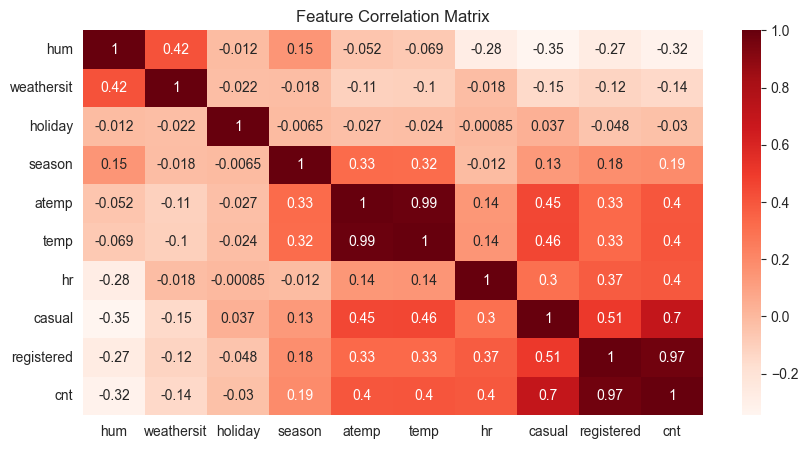

In [85]:
corr = df.corr(method ='pearson') # sebenernya gausa pake method gapapa tapi jelasin kalo defaultnya udah pake pearson
plt.figure(figsize=(10,5))
plt.title('Feature Correlation Matrix')
sns.heatmap(corr,annot=True,cmap='Reds')

Didapatkan dari matrix diatas bahwa ada korelasi positif yang kuat antara suhu perasaan `atemp` dan suhu aktual `temp`, serta antara jumlah pengguna `registered` dan `casual` terhadap target `cnt`.

Hal ini menunjukkan adanya kemungkinan terjadi multi-collinearity pada beberapa fitur.

### **Collinearity Test**

Collinearity atau Multi-collinearity terjadi ketika terdapat korelasi antara beberapa variabel independen dalam model regresi. Multicollinearity dianggap buruk untuk analisis regresi karena dapat menyebabkan beberapa masalah yang mempengaruhi keandalan hasil dan interpretasi model.Oleh karena itu penting untuk mengurangi atau mengeliminasi adanya variabel yang memiliki multi-collinearity.

---

Pada uji collinearity ini akan digunakan **Variance Inflation Factor** (VIF) sebagai acuan:
[ref](https://www.investopedia.com/terms/v/variance-inflation-factor.asp)

In [86]:
df_const = add_constant(df.drop(columns='dteday')) # memberi nilai constant pada dataset
vif_data = pd.DataFrame()
vif_data["Variable"] = df_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_const.values, i) for i in range(df_const.shape[1])]
vif_data

,Variable,VIF
0,const,28.042942
1,hum,1.528061
2,weathersit,1.248413
3,holiday,1.009965
4,season,1.182321
5,atemp,40.663674
6,temp,40.480829
7,hr,1.245361
8,casual,inf
9,registered,inf


- Dari uji collinearity didapatkan bahwa ada beberapa fitur yang mengalami collinearitas, yaitu `temp` dan `atemp` yang meiliki nilai VIF yang tinggi senilai 41. 

- Ditemukan juga pada fitur `casual` dan `registered` mendapatkan nilai VIF *infinity* ini berarti mereka memiliki collinearity yang sangat tinggi terhadap target.

Variabel yang memiliki collinearity ini akan ditangani pada tahap *feature selection* nanti agar pembelajaran algoritma model bisa lebih baik.

### **Time Series Berdasarkan Waktu**

Dalam analisis Time Series, kita dapat mengamati bagaimana variabel target dipengaruhi oleh faktor waktu, mulai dari perubahan pada tingkat jam, variasi harian, hingga perubahan bulanan. Observasi terhadap pola waktu ini memungkinkan kita untuk memahami bagaimana nilai target berfluktuasi seiring berjalannya waktu, memberikan wawasan mendalam tentang dinamika perubahan pada setiap jam, harian, dan bulanan, serta potensi pola musiman yang dapat mempengaruhi perilaku data kita.

In [87]:
# membuat dataframem copy dan melakukan ekstraksi
df_dt = df.copy()
df_dt['dteday'] = pd.to_datetime(df_dt['dteday'])
daysorted = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df_dt['month'] = df_dt['dteday'].dt.month
df_dt['day'] = df_dt['dteday'].dt.day_name()
df_dt['day'] = pd.Categorical(df_dt['day'], categories=daysorted, ordered=True)
df_dt['year'] = df_dt['dteday'].dt.year

**Hourly Data**

---

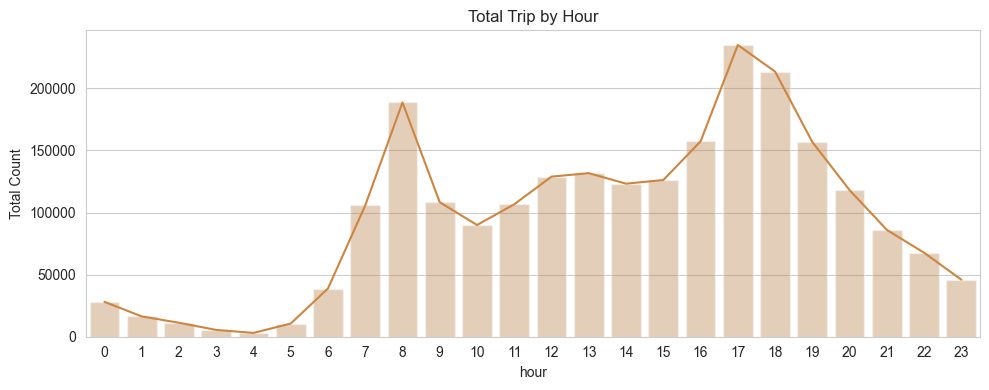

In [88]:
fig, ax1 = plt.subplots(figsize=(10, 4))
sns.set_style('whitegrid')
vis1 = df.groupby(by='hr')['cnt'].sum().reset_index()
sns.lineplot(data=vis1, x='hr', y='cnt', color='peru', ax=ax1)
sns.barplot(data=vis1, x='hr', y='cnt', alpha=0.4, color='peru', ax=ax1)
ax1.set_title('Total Trip by Hour')
ax1.set_xlabel('hour')
ax1.set_ylabel('Total Count')
plt.tight_layout()
plt.show()

Dari pola grafik perjam di atas, dapat disimpulkan bahwa faktor waktu memiliki pengaruh yang signifikan terhadap jumlah pengguna sepeda. Terutama, terlihat bahwa terjadi lonjakan pengguna pada jam-jam sibuk, terutama pada busy hour di pagi dan sore hari. Fenomena ini kemungkinan besar terkait dengan waktu berangkat dan pulang kerja, di mana banyak orang memilih menggunakan sepeda sebagai sarana transportasi pada periode tersebut. Analisis ini memperkuat pemahaman bahwa aspek waktu, khususnya pada jam-jam tertentu yang mencerminkan aktivitas harian masyarakat, memiliki dampak yang signifikan terhadap pola penggunaan sepeda.

**Daily Data**

---

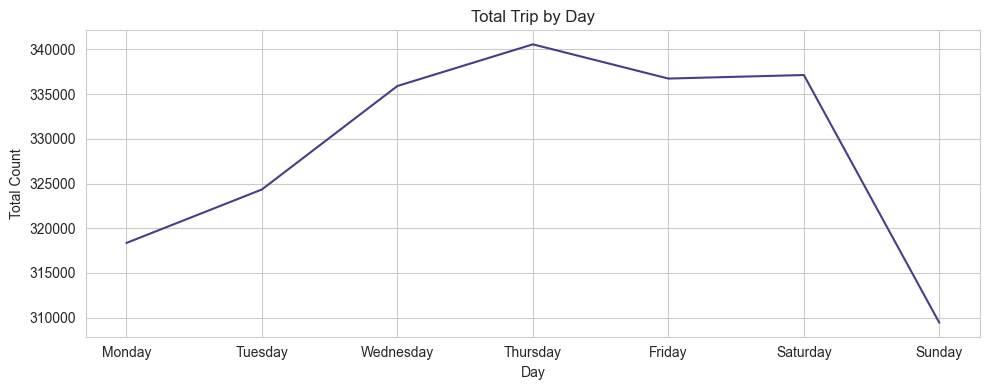

In [89]:
fig, ax2 = plt.subplots(figsize=(10, 4))
vis2 = df_dt.copy()
vis2 = vis2.groupby(by='day')['cnt'].sum().reset_index()
sns.lineplot(x='day', y='cnt', data=vis2, color='darkslateblue', ax=ax2)
ax2.set_title('Total Trip by Day')
ax2.set_xlabel('Day')
ax2.set_ylabel('Total Count')
plt.tight_layout()
plt.show()

Pada analisis data harian, ditemukan perbedaan yang mungkin terlihat relatif tidak signifikan, namun memperlihatkan pola yang menarik terkait aktivitas pengguna sepeda. Terdapat kenaikan bertahap dari awal hingga akhir weekdays, menggambarkan adanya tren peningkatan penggunaan sepeda sepanjang minggu kerja. Selain itu, terlihat bahwa jumlah pengguna mengalami penurunan pada hari Minggu. Analisis ini memberikan insight yang lebih tentang bagaimana faktor waktu, dapat memengaruhi jumlah pengguna sepeda dan mendukung hipotesis adanya hubungan antara hari kerja dengan pola penggunaan tersebut.

**Monthly Data**

---

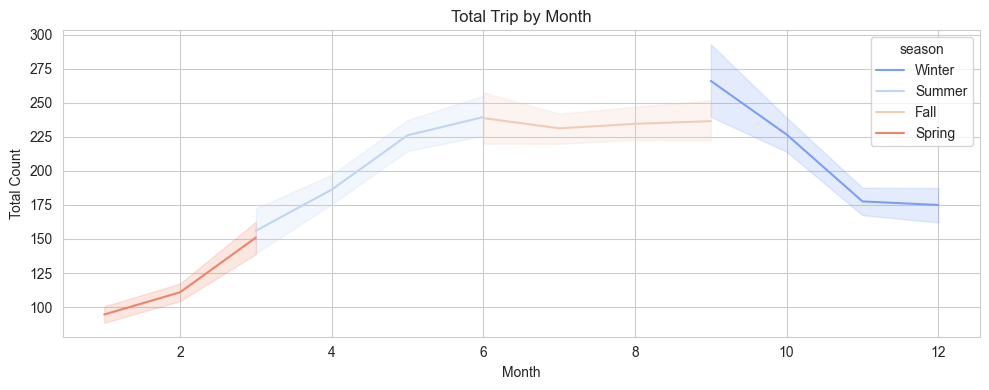

In [90]:
# Plot 3
fig, ax3 = plt.subplots(figsize=(10, 4))
vis3 = df_dt[['month', 'season', 'cnt', 'dteday']]
vis3['month'] = vis3['dteday'].dt.month
seasonmap = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
vis3['season'] = vis3['season'].map(seasonmap)
vis3 = vis3[~((vis3['month'] == 12) & (vis3['season'] == 'Spring'))]
sns.lineplot(data=vis3, x='month', y='cnt', hue='season', palette='coolwarm', ax=ax3)
ax3.set_title('Total Trip by Month')
ax3.set_xlabel('Month')
ax3.set_ylabel('Total Count')
plt.tight_layout()
plt.show()

Data time-series bulanan menyoroti tren perubahan jumlah pengguna selama setahun, menunjukkan peningkatan yang konsisten setiap bulan sejak awal tahun, terutama pada musim dingin dan musim panas. Namun, pada musim gugur, terlihat penurunan fluktuasi yang kemudian bertransisi menjadi kondisi yang lebih stabil. Menariknya, menuju akhir tahun, kita dapat mengamati penurunan signifikan dalam jumlah pengguna baru selama musim dingin. Analisis ini memberikan pemahaman yang lebih mendalam tentang dinamika penggunaan sepeda, memungkinkan identifikasi pola musiman dan tren jangka panjang yang mungkin memengaruhi data time-series tersebut.

**Monthly Data**

---

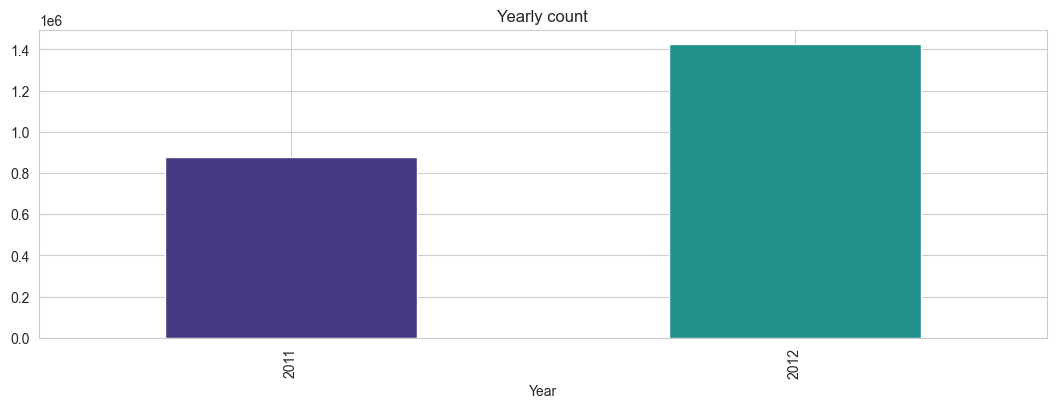

In [91]:
vis4 = df_dt.copy()
vis4 = vis4.groupby(by='year')['cnt'].sum()

# Plotting
plt.figure(figsize=(13,4))
vis4.plot(kind='bar', color=[color[1],color[5]])
plt.title('Yearly count')
plt.xlabel('Year')

plt.show()

Barplot diatas menunjukkan bahwa ada perbedaan cukup jauh antara jumlah pengguna pada tahun 2011 dan 2012, hal ini normal mengingat bisnis yang sehat adalah bisnis yang selalu bisa meningkatkan pengguna setiap tahunnya.

Hal ini menunjukkan ada tren kenaikan pengguna setiap tahunnya oleh karena itu, model ini harus selalu dilakukan fitting terhadap dataset terbaru untuk bisa menjaga performanya pada jangka panjang. 

## **Data Preparation**
---

In [92]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin, OneToOneFeatureMixin
from sklearn.pipeline import Pipeline
from pycaret.internal.preprocess.transformers import TransformerWrapper, ExtractDateTimeFeatures


Pada tahap ini, akan dianalisa kompatibilitas karakteristik dari data terhadap model yang akan dibuat, dan bagaimana tahap *preprocessing* terbaik agar dataset bisa diolah oleh model dengan baik. 

In [93]:
# duplikasi dataset untuk modelling agar data utama tidak terubah
df_model = df.copy()

### **Null Value and Duplicates**

In [94]:
# tabel informasi feature
items = []
for col in df_model.columns:
    unique_values = df_model[col].drop_duplicates()
    if len(unique_values) < 4:
        sample_values = list(unique_values.values)
    else:
        sample_values = list(unique_values.head(4).values)
    items.append([
        col,df_model[col].dtype,df_model[col].isna().sum(),df_model[col].nunique(),sample_values])

featuredesc = pd.DataFrame(columns=['features', 'dtypes', 'null', 'unique', 'sample'], data=items)
featuredesc


,features,dtypes,null,unique,sample
0,dteday,datetime64[ns],0,731,"[2011-12-09T00:00:00.000000000, 2012-06-17T00:..."
1,hum,float64,0,89,"[0.62, 0.64, 0.53, 0.87]"
2,weathersit,int64,0,4,"[1, 2, 3, 4]"
3,holiday,int64,0,2,"[0, 1]"
4,season,int64,0,4,"[4, 2, 3, 1]"
5,atemp,float64,0,65,"[0.3485, 0.5152, 0.6212, 0.697]"
6,temp,float64,0,50,"[0.36, 0.54, 0.62, 0.76]"
7,hr,int64,0,24,"[16, 4, 23, 8]"
8,casual,int64,0,305,"[24, 2, 17, 19]"
9,registered,int64,0,742,"[226, 16, 90, 126]"


In [95]:
print(f'''Number of Duplicated data = {df_model.duplicated().sum()}''')

Number of Duplicated data = 0


Dari dataset yang akan digunakan, dapat diidentifikasi bahwa dataset tersebut tidak mengandung null values atau duplicates, sehingga tidak diperlukan proses tambahan untuk menangani kekurangan data atau duplikasi.

### **Feature Engineering**


#### **Feature Selection**
---


Setelah melakukan analisis mendalam terhadap seluruh fitur yang terdapat dalam dataframe, kami akan melakukan penghapusan beberapa fitur yang dianggap tidak memberikan nilai tambah pada model, yaitu:


| Fitur        | Penjelasan                                                                                                   |
|--------------|--------------------------------------------------------------------------------------------------------------|
| `atemp`      | Nilai ini memiliki kemungkinan besar untuk mengalami colinearity terhadap feature lainnya, yaitu `temp`. Oleh karena itu, hanya akan diambil satu feature (`temp`) untuk digunakan pada pemodelan.                                    |
| `casual` dan `registered`     | Kedua fitur ini sudah terwakili oleh variabel target `cnt`. Dengan mempertimbangkan bahwa fokus utama algoritma Machine Learning ini bukan pada jenis pemesan, kedua fitur ini dianggap tidak signifikan untuk dimasukkan dalam model.  |
| `cnt`        | Merupakan variabel target yang akan diprediksi oleh model.                                                       |


In [96]:
dropfeature = ['cnt','casual','registered','atemp']

#### **Feature Creation**
---

Dalam pengembangan model ini, pembentukan fitur akan difokuskan pada ekstraksi informasi tanggal menggunakan modul `ExtractDateTimeFeatures()` dari PyCaret. 

Proses ekstraksi ini akan dilakukan pada fitur `dteday` yang akan dibagi menjadi 3 fitur berbeda yaitu tanggal `day`, bulan `month`, tahun `year` dan hari `weekday`

#### **Encoding**
---

Untuk mempermudah model melakukan klasifikasi pada data kategorikal, akan dilakukan proses encoding menggunakan `OneHotEncoding()` dari Scikit-learn.

Data yang akan digunakan untuk encoding adalah data `season`, `weathersit` yang memiliki kardinalitas yang kecil sehingga tidak membuat terlalu banyak fitur. Lalu juga akan dilakukan pada fitur yang telah diekstraksi dari *datetimme* yaitu `dteday_weekday`, `dteday_day`, `dteday_month`, dan `dteday_year`.

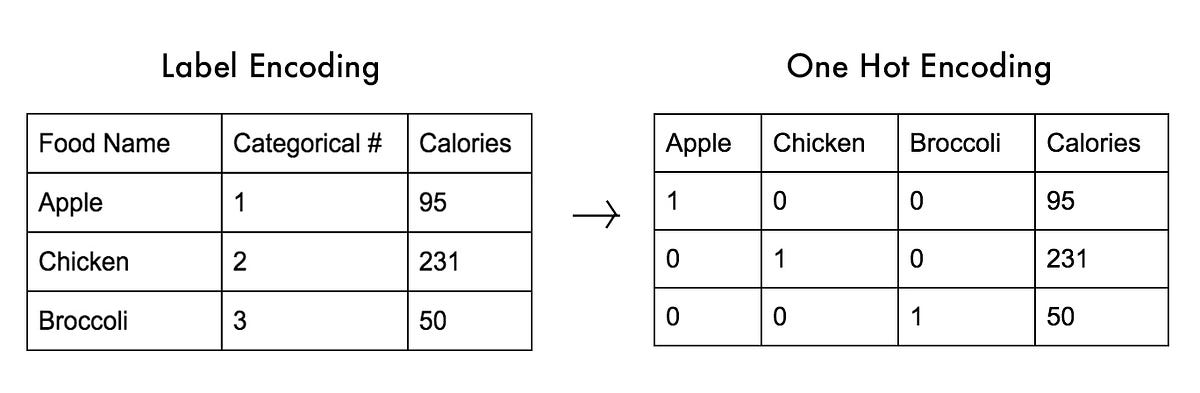

#### **Data Preprocessing Pipeline**
---

Semua tahap *Feature Engineering* tadi akan dimasukkan kedalam Pipeline model agar proses *pre-processing* dapat dijalankan secara otomatis dan terorganisir. Berikut adalah rincian langkah-langkah yang akan dimasukkan ke dalam pipeline:

| Proses | Deskripsi | Processed Feature |
| --- | --- | ---|
| **Feature Creation** | Menggunakan `ExtractDateTimeFeatures` dari PyCaret untuk mengekstrak hari, bulan, tahun, dan hari dari fitur 'dteday'. |`dteday`|
| **Feature Selection** | Menggunakan `ColumnTransformer` untuk menghapus fitur-fitur tertentu ('atemp', 'casual', 'registered') dari dataset. Parameter `remainder='passthrough'` memastikan fitur yang tersisa tetap ada. | `atemp`,`casual`,`registered`|
| **Encoding** | Menggunakan `OneHotEncoder` dari Scikit-learn untuk melakukan pengkodean pada fitur kategorikal terpilih . Kategori pertama dihapus, dan kategori yang tidak dikenal diabaikan. |`dteday_weekday`, `dteday_day`, `dteday_month`, `dteday_year`, `season`, `weathersit`|


Dengan menggunakan `Pipeline`, semua proses ini dapat dijalankan secara bersamaan dan otomatis, memudahkan proses pengembangan dan evaluasi model.

In [97]:
# membuat pipeline preprocessing
extractdate = TransformerWrapper(
                include=['dteday'],
                transformer=ExtractDateTimeFeatures(
                    features=['day', 'month', 'year','weekday']))


selection = ColumnTransformer(
    transformers=[
        ('drop_out', 'drop', ['atemp', 'casual', 'registered']),
    ],
    remainder='passthrough', 
    verbose_feature_names_out=False)

encoder = TransformerWrapper(
        include=['dteday_weekday','dteday_day', 'dteday_month', 'dteday_year', 'season', 'weathersit'],
        transformer=OneHotEncoder(drop='first', handle_unknown='ignore'))


preprocessor = Pipeline(steps=[
    ('datext', extractdate), 
    ('encoder', encoder),
    ('selection',selection)])

## **Machine Learning Modeling**
---

In [98]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline

Pada tahap ini akan dilakukan Machine Learning Modeling terhadap dataset yang ada, proses ini bertujuan untuk merumuskan algoritma terbaik untuk melakukan prediksi regresi dari target jumlah (`cnt`) dari kalkulasi fitur yang ada. 

Untuk memenuhi tujuan ini akan dilewati beberapa tahap, yaitu:

1. Melakukan **splitting data** menjadi training dan testing.
2. Melakukan **benchmarking dan cross validation** terhadap beberapa model untuk menemukan model yang optimal.
3. Melakukan **hyperparameter tuning** terhadap tiga model yang terbaik.


### **Splitting data training dan data testing**

Dataset `df_model` akan dibagi menjadi dua subset dengan rasio 80 : 20, dataset pertama (80%) akan digunakan sebagai dataset **training** dan **validasi**, yaitu data yang akan digunakan untuk melatih model melakukan *learning*, dan dataset kedua (20%) akan digunakan menjadi dataset **testing** untuk melakukan evaluasi yang tidak memiliki bias terhadap data yang sudah dilakukan fitting. 

In [99]:
X = df_model.drop(columns='cnt')
y = df_model['cnt']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1223,test_size=0.2)

### **Model Selection and Benchmarking**
---

Proses ini akan melakukan *selection* untuk mencari model terbaik untuk dataset. Benchmarking akan dilakukan terhadap beberapa model *Machine learning* regresi.

Berdasarkan karakteristik dari data yang non-linear, maka akan digunakan beberapa ensemble model:


| No. | **Model**                        | **Deskripsi**                                                                                              |
|-----|----------------------------------|------------------------------------------------------------------------------------------------------------|
| 1   | **Linear Regression**            | Mengasumsikan hubungan linier antara fitur dan target. Model yang sederhana dan mudah diinterpretasi.      |
| 2   | **Light Gradient Boosting Regression**   | Model *boosting tree* yang efisien dengan fokus pada kecepatan dan kinerja.                                |
| 3   | **Gradient Boosting Regression** | Metode *ensemble* yang membangun serangkaian pohon keputusan untuk meningkatkan akurasi prediksi.            |
| 4   | **Random Forest Regression**    | Metode *ensemble* yang menggunakan beberapa pohon keputusan untuk membuat prediksi. Dapat menangani berbagai jenis data. |
| 5   | **Extra Trees Regression**       | Varian dari Random Forest yang menggunakan pemilihan acak fitur dan ambang batas pada setiap *split* untuk meningkatkan kecepatan. |
| 6   | **Decision Tree Regression**     | Model yang membagi data menjadi subset berdasarkan aturan keputusan. Sederhana dan mudah diinterpretasi, tetapi rentan terhadap overfitting. |
| 7   | **CatBoost Regression**          | Model *gradient boosting* yang dioptimalkan untuk fitur kategori. Dapat menangani data kategori tanpa preprocessing khusus. |




In [100]:
# Algorithms
lr = LinearRegression()
lightgbm = LGBMRegressor(verbosity=0)
gbr = GradientBoostingRegressor()
rf = RandomForestRegressor()
et = ExtraTreesRegressor()
xgb = XGBRegressor()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
cat = CatBoostRegressor(verbose=0)

models = [lr, lightgbm, gbr, rf, et, xgb, knn, dt, cat]

### **Crossvalidation and Evaluation Metric**
---

Pada proses selanjutnya akan dilakukan *cross validation* pada dataset *training* menggunakan metode `KFold` untuk menilai performa dan kemampuan generalisasi dari sebuah model.

Untuk melakukan benchmarking ini maka akan digunakan beberapa evaluation metric, yaitu:

| **Metrik Evaluasi**                    | **Deskripsi**                                                                                           |
|---------------------------------------|---------------------------------------------------------------------------------------------------------|
| **Mean Absolute Error (MAE)**          | Nilai selisih antara nilai data riil dan nilai prediksi dari model. Metode ini cukup robust terhadap efek outlier. |
| **Mean Absolute Percentage Error (MAPE)** | Nilai setara dengan MAE yang dikonversikan menjadi persentase. Metrik ini menjadi indikator utama karena memiliki nilai yang lebih objektif. Sama seperti MAE, metode ini juga memiliki kekuatan terhadap efek outlier. |
| **Root Mean Standard Error (RMSE)**    | Sama seperti MSE, tetapi mengkuadratkan selisihnya sebelum menjumlahkannya menggunakan nilai absolut. Metode ini tidak memiliki kekuatan yang tinggi terhadap outlier. |




In [101]:
# parameter model
score_rmse = []
mean_rmse = []
std_rmse = []

score_mae = []
mean_mae = []
std_mae = []

score_mape = []
mean_mape = []
std_mape = []


for reg in models:
    crossval = KFold(n_splits=5, shuffle=True, random_state=99)
    estimator = Pipeline([('preprocess',preprocessor),
                          ('model', reg)])
    
    # RMSE
    model_cval_rmse = cross_val_score(
        estimator,
        X_train,
        y_train,
        verbose=False,
        cv=crossval,
        scoring='neg_root_mean_squared_error',
        error_score='raise')


    score_rmse.append(model_cval_rmse)
    mean_rmse.append(model_cval_rmse.mean())
    std_rmse.append(model_cval_rmse.std())

    # MAE
    model_cval_mae = cross_val_score(
        estimator,
        X_train,
        y_train,
        verbose=False,
        cv=crossval,
        scoring='neg_mean_absolute_error',
        error_score='raise')
    score_mae.append(model_cval_mae)
    mean_mae.append(model_cval_mae.mean())
    std_mae.append(model_cval_mae.std())

    # MAPE
    model_cval_mape = cross_val_score(
        estimator,
        X_train,
        y_train,
        verbose=False,
        cv=crossval,
        scoring='neg_mean_absolute_percentage_error',
        error_score='raise')
    score_mape.append(model_cval_mape)
    mean_mape.append(model_cval_mape.mean())
    std_mape.append(model_cval_mape.std())


In [102]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
evaluation = pd.DataFrame({
    'Model': ['Linear Regression', 'LightGBM Regressor', 'GBR Regressor', 'Random Forest Regressor', 'Extra Trees Regressor','XGBoost Regressor','KNeighbors Regressor','Decision Tree Regressor','Catboost Regressor'],
    'Mean_MAPE': mean_mape,
    'Std_MAPE': std_mape,
    'Mean_RMSE': mean_rmse,
    'Std_RMSE': std_rmse,
    'Mean_MAE': mean_mae,
    'Std_MAE': std_mae})

evaluation.round(2)

,Model,Mean_MAPE,Std_MAPE,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE
0,Linear Regression,-3.36,0.16,-141.67,2.58,-106.06,1.11
1,LightGBM Regressor,-0.46,0.03,-45.56,1.36,-29.14,0.60
2,GBR Regressor,-0.96,0.08,-81.25,2.37,-55.85,1.08
3,Random Forest Regressor,-0.37,0.02,-50.19,2.19,-30.77,0.91
4,Extra Trees Regressor,-0.35,0.02,-45.71,1.86,-28.21,0.82
5,XGBoost Regressor,-0.52,0.03,-45.94,1.89,-29.60,0.87
6,KNeighbors Regressor,-0.59,0.04,-74.45,1.72,-47.82,1.27
7,Decision Tree Regressor,-0.43,0.03,-69.07,3.29,-40.41,1.17
8,Catboost Regressor,-0.53,0.02,-43.47,1.11,-28.11,0.60


Setelah proses *cross validation*, hasil evaluasi menunjukkan bahwa model terbaik berdasarkan beberapa metrik performa adalah `RandomoForestRegressor()` dengan MAPE sebesar 36% dan MAE sebesar 30.73.

Walaupun sudah didapatkan model yang terbaik, tetapi model yang kita buat masih mendapatkan nilai MAPE yang relatif tinggi, hal ini kemungkinan besar dikarenakan adanya range yang besar dan distribusi data yang positive-skewed, oleh karena itu akan dicoba menggunakan transformasi logaritm menggunakan *transformed target regressor* pada variabel target. Hal ini dilakukan untuk meminimalisir variansi dan distribusi mempengaruhi akurasi pembelajaran model. 

In [103]:
# Melakukan logaritma agar 
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_lightgbm = TransformedTargetRegressor(lightgbm, func=np.log, inverse_func=np.exp)
log_gbr = TransformedTargetRegressor(gbr, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_et = TransformedTargetRegressor(et, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_cat = TransformedTargetRegressor(cat, func=np.log, inverse_func=np.exp)

log_models = [log_lr,log_lightgbm,log_gbr,log_rf,log_et, log_xgb, log_knn, log_dt, log_cat]

In [104]:
# parameter model
score_rmse = []
mean_rmse = []
std_rmse = []

score_mae = []
mean_mae = []
std_mae = []

score_mape = []
mean_mape = []
std_mape = []

for reg in log_models:
    crossval = KFold(n_splits=5, shuffle=True, random_state=99)

    estimator = Pipeline([('preprocess',preprocessor),
                          ('model', reg)])
    
    # RMSE
    model_cval_rmse = cross_val_score(
        estimator,
        X_train,
        y_train,
        verbose=False,
        cv=crossval,
        scoring='neg_root_mean_squared_error',
        error_score='raise')


    score_rmse.append(model_cval_rmse)
    mean_rmse.append(model_cval_rmse.mean())
    std_rmse.append(model_cval_rmse.std())

    # MAE
    model_cval_mae = cross_val_score(
        estimator,
        X_train,
        y_train,
        verbose=False,
        cv=crossval,
        scoring='neg_mean_absolute_error',
        error_score='raise')
    score_mae.append(model_cval_mae)
    mean_mae.append(model_cval_mae.mean())
    std_mae.append(model_cval_mae.std())

    # MAPE
    model_cval_mape = cross_val_score(
        estimator,
        X_train,
        y_train,
        verbose=False,
        cv=crossval,
        scoring='neg_mean_absolute_percentage_error',
        error_score='raise')
    score_mape.append(model_cval_mape)
    mean_mape.append(model_cval_mape.mean())
    std_mape.append(model_cval_mape.std())


In [105]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
evaluation = pd.DataFrame({
    'Model': ['Linear Regression', 'LightGBM Regressor', 'GBR Regressor', 'Random Forest Regressor', 'Extra Trees Regressor','XGBoost Regressor','KNeighbors Regressor','Decision Tree Regressor','Catboost'],
    'Mean_MAPE': mean_mape,
    'Std_MAPE': std_mape,
    'Mean_RMSE': mean_rmse,
    'Std_RMSE': std_rmse,
    'Mean_MAE': mean_mae,
    'Std_MAE': std_mae})

evaluation.round(2)

,Model,Mean_MAPE,Std_MAPE,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE
0,Linear Regression,-1.38,0.06,-162.18,2.58,-106.76,1.64
1,LightGBM Regressor,-0.27,0.01,-48.41,1.26,-29.77,0.53
2,GBR Regressor,-0.47,0.01,-90.08,2.97,-56.84,1.39
3,Random Forest Regressor,-0.30,0.02,-49.39,1.61,-30.04,0.54
4,Extra Trees Regressor,-0.28,0.01,-45.47,1.81,-27.90,0.60
5,XGBoost Regressor,-0.26,0.01,-45.18,0.71,-27.58,0.34
6,KNeighbors Regressor,-0.43,0.02,-77.43,1.27,-47.24,0.71
7,Decision Tree Regressor,-0.42,0.02,-67.02,2.37,-39.28,1.26
8,Catboost,-0.24,0.01,-42.13,1.16,-25.87,0.59


Dan benar, setelah dilakukan *target transforming*, nilai metrik evaluasi yang didapatkan dari model-model tersebut mengalami peningkatan yang sangat signifikan. Dan didapatkan pada hasil evaluasi yang terbaru bahwa model terbaik berdasarkan beberapa metrik performa adalah `CatboostRegressor()` dengan MAPE sebesar 24% dan MAE sebesar 25.87, diikuti dengan `XGBoostRegressor()` dengan MAPE sebesar 26% dan MAE sebesar 27.58. 

Dari sini telah didapatkan dua model dengan performa terbaik, selanjutnya akan dilakukan *Hyperparameter tuning* untuk memaksimalakan performa setiap model

### ***Hypeparameter Tuning***
---

Pada langkah ini, akan melakukan penyetelan hyperparameter untuk mengidentifikasi kombinasi nilai hyperparameter yang optimal pada dua model terbaik sebelumnya. Dari kedua model terbaik tadi, akan dipilih model yang memberikan kinerja terbaik setelah tuning dan akan dijadikan model final. 

`CatboostRegressor()` dan `XGBoostRegressor()` memiliki similaritas dimana kedua model ini menggunakan framework ***gradient boosting***, maka akan diimplementasikan *hyperparameter* yang sama untuk proses *tuning*.


| **Hyperparameter** | **Deskripsi**                                                                                                                           |
|---------------------|------------------------------------------------------------------------------------------------------------------------------------------|
| Learning Rate       | Learning rate mengontrol kontribusi setiap pohon terhadap prediksi akhir. Tingkat pembelajaran yang lebih kecil memerlukan lebih banyak pohon dalam ensemble, tetapi dapat menghasilkan model yang lebih kuat dan akurat. |
| Number of Trees     | Hyperparameter ini menetapkan jumlah pohon (pembelajar lemah) yang akan dibangun dalam ensemble. Meningkatkan jumlah pohon umumnya meningkatkan kinerja model sampai model mulai overfitting. Namun, ada trade-off karena lebih banyak pohon juga berarti waktu pelatihan yang lebih lama. Penting untuk menemukan keseimbangan yang tepat melalui teknik seperti validasi silang.                   |
| Max Depth           | Hyperparameter ini mengontrol kedalaman maksimum setiap pohon dalam ensemble. Pohon yang lebih dalam dapat menangkap pola yang lebih kompleks dalam data tetapi lebih rentan terhadap overfitting. Menetapkan kedalaman maksimum yang sesuai penting untuk mencegah model menjadi terlalu kompleks dan menyesuaikan noise dalam data pelatihan. Ini membantu mencapai keseimbangan yang baik antara bias dan varians. |


### **XGBoost Regressor**
---

In [106]:
hyperParamXGB = {'model__regressor__max_depth': list(np.arange(2, 10)), 
                 'model__regressor__learning_rate': list(np.arange(0, 40, 5)/100),
                 'model__regressor__n_estimators': list(np.arange(200, 301, 50))}


pipeXGB = Pipeline([('Preprocess', preprocessor),
                    ('model',log_xgb)])

gridSearchXGB =  GridSearchCV(estimator = pipeXGB,
                             param_grid= hyperParamXGB,
                             cv = 5,
                             scoring =['neg_mean_absolute_error',
                                        'neg_mean_absolute_percentage_error',
                                        'neg_mean_squared_error',
                                        'neg_root_mean_squared_error'],
                             refit = 'neg_mean_absolute_percentage_error',)

In [107]:
gridSearchXGB.fit(X_train, y_train)

XGB_param = gridSearchXGB.best_params_
XGB_score = gridSearchXGB.best_score_
XGB_estimator = gridSearchXGB.best_estimator_
XGB_MAE = pd.DataFrame(gridSearchXGB.cv_results_['mean_test_neg_mean_absolute_error']).fillna(0).mean()[0]

display(
XGB_param, XGB_score, XGB_estimator)

{'model__regressor__learning_rate': 0.15,
 'model__regressor__max_depth': 6,
 'model__regressor__n_estimators': 300}

-0.24727147252691237

Pipeline(steps=[('Preprocess',
                 Pipeline(steps=[('datext',
                                  TransformerWrapper(include=['dteday'],
                                                     transformer=ExtractDateTimeFeatures(features=['day',
                                                                                                   'month',
                                                                                                   'year',
                                                                                                   'weekday']))),
                                 ('encoder',
                                  TransformerWrapper(include=['dteday_weekday',
                                                              'dteday_day',
                                                              'dteday_month',
                                                              'dteday_year',
                                                              'season',
                                                              'weathersit'],
                                                     transformer=OneHotEncoder(drop='first',
                                                                               handle_unknown=...
                                                                   grow_policy=None,
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=0.15,
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=6,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=300,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=None, ...)))])

In [108]:
XGB_best_params = {'model__regressor__learning_rate': 0.21,
 'model__regressor__max_depth': 6,
 'model__regressor__n_estimators': 300}

### **Catboost Regressor**
---

In [109]:
hyperParamCat = {'model__regressor__max_depth': list(np.arange(2, 10)), 
                 'model__regressor__learning_rate': list(np.arange(0, 40, 5)/100),
                 'model__regressor__n_estimators': list(np.arange(200, 301, 50))}

pipeCat = Pipeline([('Preprocess', preprocessor),
                    ('model',log_cat)])

gridSearchCat =  GridSearchCV(estimator = pipeCat,
                             param_grid= hyperParamCat,
                             cv = 5,
                             scoring = ['neg_mean_absolute_error',
                                        'neg_mean_absolute_percentage_error',
                                        'neg_mean_squared_error',
                                        'neg_root_mean_squared_error'],
                             refit = 'neg_mean_absolute_percentage_error')

In [110]:
gridSearchCat.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocess',
                                        Pipeline(steps=[('datext',
                                                         TransformerWrapper(include=['dteday'],
                                                                            transformer=ExtractDateTimeFeatures(features=['day',
                                                                                                                          'month',
                                                                                                                          'year',
                                                                                                                          'weekday']))),
                                                        ('encoder',
                                                         TransformerWrapper(include=['dteday_weekday',
                                                                                     'dteday_day',
                                                                                     'dteday_month',
                                                                                     'dteday_year',
                                                                                     'season',
                                                                                     'weathersit'],
                                                                            transformer=OneHotEncoder(...
             param_grid={'model__regressor__learning_rate': [0.0, 0.05, 0.1,
                                                             0.15, 0.2, 0.25,
                                                             0.3, 0.35],
                         'model__regressor__max_depth': [2, 3, 4, 5, 6, 7, 8,
                                                         9],
                         'model__regressor__n_estimators': [200, 250, 300]},
             refit='neg_mean_absolute_percentage_error',
             scoring=['neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error',
                      'neg_mean_squared_error', 'neg_root_mean_squared_error'])

In [111]:
Cat_param = gridSearchCat.best_params_
Cat_score = gridSearchCat.best_score_
Cat_estimator = gridSearchCat.best_estimator_

display(
Cat_param, Cat_score, Cat_estimator)

{'model__regressor__learning_rate': 0.2,
 'model__regressor__max_depth': 9,
 'model__regressor__n_estimators': 300}

-0.23402597693512953

Pipeline(steps=[('Preprocess',
                 Pipeline(steps=[('datext',
                                  TransformerWrapper(include=['dteday'],
                                                     transformer=ExtractDateTimeFeatures(features=['day',
                                                                                                   'month',
                                                                                                   'year',
                                                                                                   'weekday']))),
                                 ('encoder',
                                  TransformerWrapper(include=['dteday_weekday',
                                                              'dteday_day',
                                                              'dteday_month',
                                                              'dteday_year',
                                                              'season',
                                                              'weathersit'],
                                                     transformer=OneHotEncoder(drop='first',
                                                                               handle_unknown='ignore'))),
                                 ('selection',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('drop_out',
                                                                   'drop',
                                                                   ['atemp',
                                                                    'casual',
                                                                    'registered'])],
                                                    verbose_feature_names_out=False))])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=<catboost.core.CatBoostRegressor object at 0x000001588E1125B0>))])

Dari proses tuning kita telah mendapat hyperparameter terbaik untuk 

In [112]:
catboost_best_params = {'model__regressor__learning_rate': 0.25,
 'model__regressor__max_depth': 9,
 'model__regressor__n_estimators': 300}

In [113]:
Cat_MAPE_before = evaluation.loc[8]['Mean_MAPE']
XGB_MAPE_before = evaluation.loc[5]['Mean_MAPE']
Cat_MAE_before = evaluation.loc[8]['Mean_MAE']
XGB_MAE_before = evaluation.loc[5]['Mean_MAE']

# final scoring
final_score = pd.DataFrame({
    'Model' : ['XGBoost Regressor','Catboost Regressor'],
    'MAPE After' : [XGB_score.round(3),Cat_score.round(3)],
    'MAPE Before' : [XGB_MAPE_before.round(3),Cat_MAPE_before.round(3)],
})
final_score

,Model,MAPE After,MAPE Before
0,XGBoost Regressor,-0.247,-0.262
1,Catboost Regressor,-0.234,-0.242


Dari proses tuning ini telah kita telah mendapatkan insight bahwa setelah menggunakan iterasi hyperparameter terbaik, dibandingkan metode regresi yang lain, metode `CatBoost Regressor` dengan *Transformed Target Regressor* memiliki kinerja performa yang lebih baik dengan MAPE = 23%.

Oleh karena itu maka `CatBoost Regressor` akan dipilih untuk digunakan pada final model.

In [114]:
final_model = TransformedTargetRegressor(regressor=
    CatBoostRegressor(
        learning_rate=0.25,
        max_depth=9,
        n_estimators=300,
        verbose=False), 
    func=np.log, 
    inverse_func=np.exp)

finalpipeline = Pipeline([('Preprocess', preprocessor), ('model', final_model)])
finalpipeline.fit(X_train, y_train)

Pipeline(steps=[('Preprocess',
                 Pipeline(steps=[('datext',
                                  TransformerWrapper(include=['dteday'],
                                                     transformer=ExtractDateTimeFeatures(features=['day',
                                                                                                   'month',
                                                                                                   'year',
                                                                                                   'weekday']))),
                                 ('encoder',
                                  TransformerWrapper(include=['dteday_weekday',
                                                              'dteday_day',
                                                              'dteday_month',
                                                              'dteday_year',
                                                              'season',
                                                              'weathersit'],
                                                     transformer=OneHotEncoder(drop='first',
                                                                               handle_unknown='ignore'))),
                                 ('selection',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('drop_out',
                                                                   'drop',
                                                                   ['atemp',
                                                                    'casual',
                                                                    'registered'])],
                                                    verbose_feature_names_out=False))])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=<catboost.core.CatBoostRegressor object at 0x000001588E8117F0>))])

## **Final Model Evaluation**
---

### **Fitting to Test** 

In [115]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

Setelah kita menemukan model algoritma Machine Learning dengan performa terbaik pada training dan valiadation dataset, selanjutnya akan dilakukan fitting ke unseen dataset yaitu test dataset. Hal ini akan membuktikan betapa baiknya kemampuan model dalam melakukan prediksi regresi terhadap data yang belum pernah dilihat (*unseen*)


Dengan kata lain, ketika kita menguji model pada set data yang tidak digunakan selama pelatihan, kita dapat melihat seberapa baik model tersebut mampu menangani situasi yang belum pernah ditemui sebelumnya. Hasil pengujian ini memberikan gambaran objektif tentang sejauh mana model dapat diandalkan dalam situasi dunia nyata. Informasi ini sangat berharga dalam membuat keputusan apakah model tersebut layak untuk diimplementasikan secara luas atau memerlukan perubahan agar bisa valid dilakukan *deploy*.

In [116]:
y_pred = finalpipeline.predict(X_test)
MAPEtest = mean_absolute_percentage_error(y_test,y_pred)
MAEtest = mean_absolute_error(y_test,y_pred).round(3)
MSEtest = mean_squared_error(y_test,y_pred).round(3)
RMSEtest = np.sqrt(mean_squared_error(y_test,y_pred)).round(2)

In [117]:
final_test_score = pd.DataFrame({
    'Model' : ['Tuned Catboost'],
    'MAPE Score' : f'{MAPEtest.round(3)}',
    'MAE Score' : MAEtest,
    'MSE Score' : MSEtest,
    'RMSE Score' : RMSEtest
})
final_test_score

,Model,MAPE Score,MAE Score,MSE Score,RMSE Score
0,Tuned Catboost,0.233,22.853,1441.526,37.97


Bisa dilihat bahwa terdapat konsistensi dalam hasil evaluasi model setelah dilakukan penyesuaian pada data uji, di mana metrik MAPE dan MAE hanya mengalami sedikit perubahan dari 23.4% menjadi 23.3%. Hal ini menunjukkan bahwa model memiliki kemampuan untuk melakukan prediksi terhadap data yang belum pernah dilihat sebelumnya dengan tingkat akurasi yang relatif baik.

### **Feature Importance**
---

Pada tahap ini akan dibedah tolak ukur besaran kontribusi dari setiap feature terhadap hasil prediksi, hal ini dilakukan untuk menjelaskan lebih dalam kepada stakeholder bagaimana model ini bisa bekerja dengan baik. 

<Axes: title={'center': 'Feature Importances'}>

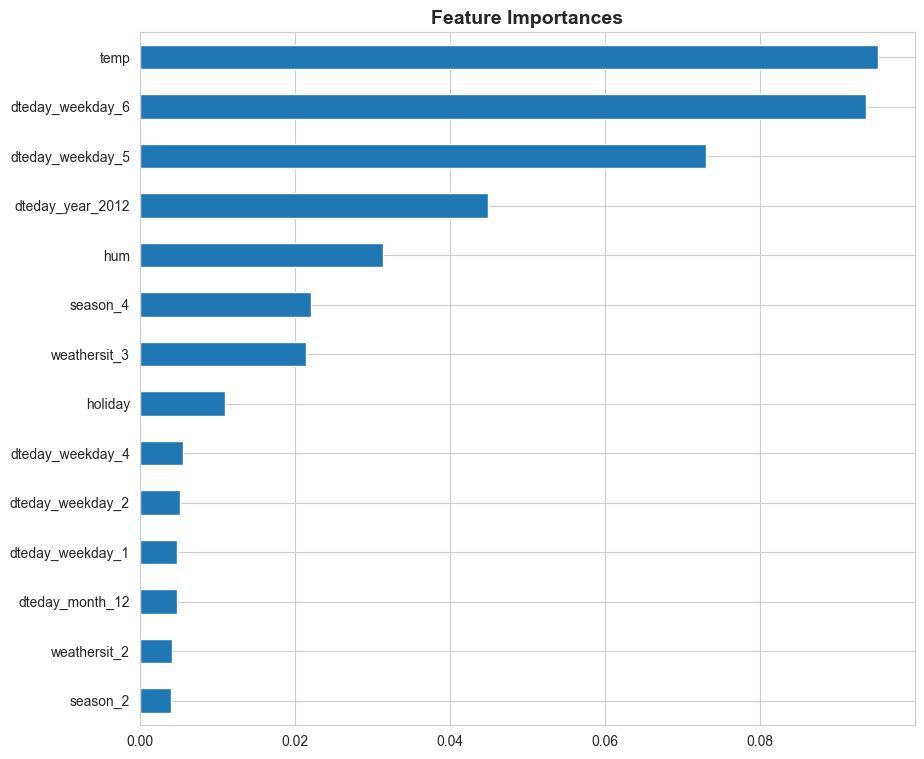

In [118]:
feature_importances = pd.Series(Cat_estimator['model'].regressor_.feature_importances_, selection.get_feature_names_out()).sort_values(ascending=True) / 100
feature_importances = feature_importances[-15:-1]
plt.figure(figsize=(10,9))
plt.title('Feature Importances', size=14, fontweight='bold')
feature_importances.plot(kind='barh')

**Result:**
- Dari hasil diatas didapatkan bahwa fitur `temp`, `dte_weekday6` dan `dte_weekday6` dan memiliki nilai kontribusi yang paling besar terhadap model dengan nilai diatas 6%. Hal ini berarti tingginya suhu mempengaruhi jumlah penggunaan sepeda. untuk kedua fitur weekday menandakan bahwa ada pengaruh besar terhadap hari Sabtu dan Minggu, ini menandakan bahwa status weekend mempengaruhi penggunaan.
- Grafik ini pun diikuti oleh fitur `dteday_year_2012` dengan nilai 4% yang berarti tahun juga mempengaruhi rentang nilai target.
- `hum`, `holiday` ,`season` dan `weathersit` menjadi fitur yang tidak memiliki kontribusi besar namun masih berpengaruh.

### **Residual Analysis**
---

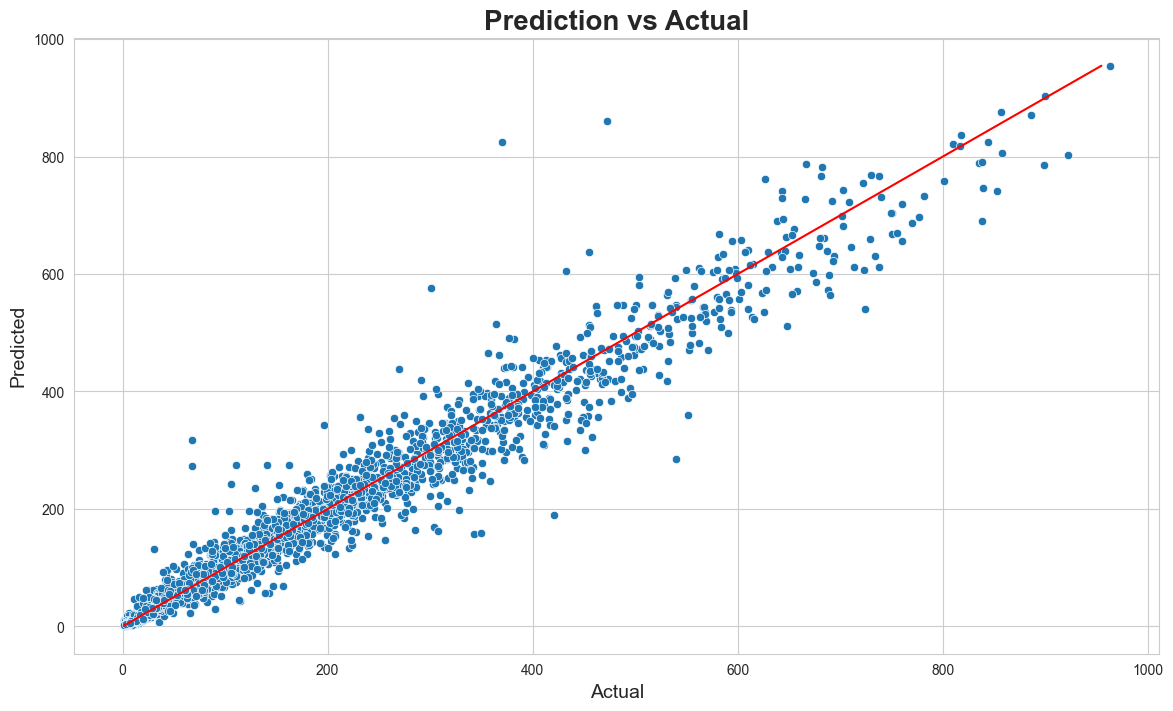

In [119]:
plt.figure(figsize=(14,8))
plt.title('Prediction vs Actual', size=20, fontweight='bold')
sns.scatterplot(x=y_test,y=y_pred)
sns.lineplot(x=y_pred, y=y_pred, color='red')
plt.xlabel('Actual',size=14)
plt.ylabel('Predicted',size=14)
plt.show()

In [120]:
test_data = X_test.copy()
test_data['Prediction'] = y_pred.round()
test_data['cnt'] = y_test
test_data['Residual'] = test_data['cnt'] - test_data['Prediction']

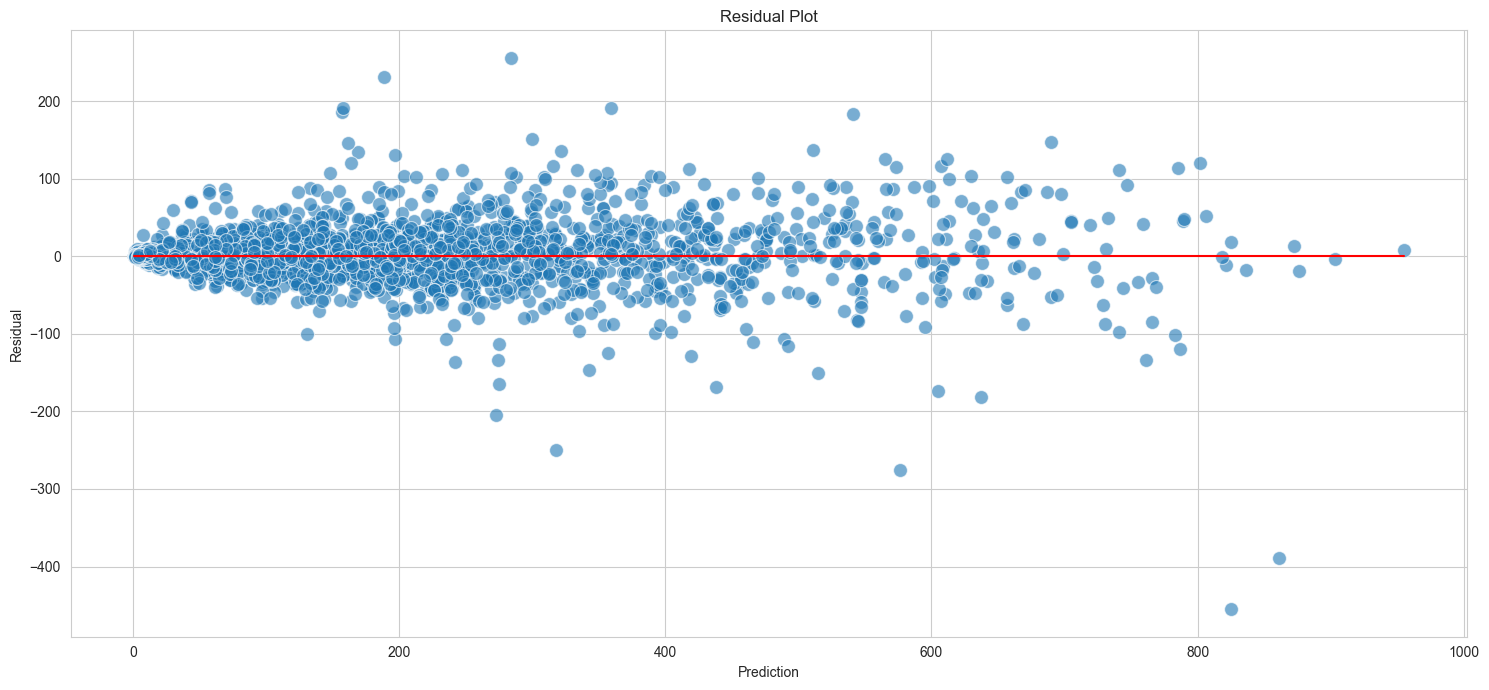

In [121]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=test_data, x='Prediction',y='Residual', s=100, alpha=0.6)
sns.lineplot(data=test_data, x='Prediction',y=0, color='red')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

In [161]:
outlier_index = list(test_data[test_data['Residual'] < -300].index)
outlier_frame = test_data[test_data['Residual'] < -300].sort_index()
outlier_frame['dteday'] = pd.to_datetime(outlier_frame['dteday'])
outlier_frame['day'] = outlier_frame['dteday'].dt.dayofweek 
outlier_frame['year'] = outlier_frame['dteday'].dt.year
outlier_frame['month'] = outlier_frame['dteday'].dt.month
outlier_frame['date'] = outlier_frame['dteday'].dt.day
outlier_idx = list(outlier_frame.index)
outlier_frame

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,Prediction,cnt,Residual,day,year,month,date
7290,2012-07-18,0.70,1,0,3,0.6970,0.74,17,35,335,825.0,370,-455.0,2,2012,7,18
9143,2011-08-23,0.34,1,0,3,0.6515,0.72,17,133,339,861.0,472,-389.0,1,2011,8,23


In [169]:
outlier_similar = df_model[df_model['cnt'].isin(outlier_frame['cnt'])].sort_values(by='cnt')
outlier_similar['dteday'] = pd.to_datetime(outlier_similar['dteday'])
outlier_similar['day'] = outlier_similar['dteday'].dt.dayofweek 
outlier_similar['year'] = outlier_similar['dteday'].dt.year
outlier_similar['month'] = outlier_similar['dteday'].dt.month
outlier_similar['date'] = outlier_similar['dteday'].dt.day
outlier_similar.drop(columns='dteday',inplace=True)
outlier_aggregate = outlier_similar.groupby('cnt').agg({
'hum': 'mean',
'temp': 'mean',
'weathersit': lambda x: x.mode().iloc[0],
'holiday': lambda x: x.mode().iloc[0],
'season': lambda x: x.mode().iloc[0],
'hr': lambda x: x.mode().iloc[0],
'year': lambda x: x.mode().iloc[0],
'month': lambda x: x.mode().iloc[0],
'date': lambda x: x.mode().iloc[0],
'day': lambda x: x.mode().iloc[0] }).reset_index()

In [124]:
print('Top 5 Features')
feature_importances[-5:].sort_values(ascending=False)

Top 5 Features


temp                0.095167
dteday_weekday_6    0.093642
dteday_weekday_5    0.073042
dteday_year_2012    0.044900
hum                 0.031360
dtype: float64

In [172]:
display(
('Outlier Data'),
outlier_frame[['cnt', 'hum', 'temp', 'weathersit', 'holiday', 'season', 'hr', 'year',
       'month', 'date', 'day']],
('Data Aggregate'),
outlier_aggregate)

'Outlier Data'

,cnt,hum,temp,weathersit,holiday,season,hr,year,month,date,day
7290,370,0.70,0.74,1,0,3,17,2012,7,18,2
9143,472,0.34,0.72,1,0,3,17,2011,8,23,1


'Data Aggregate'

,cnt,hum,temp,weathersit,holiday,season,hr,year,month,date,day
0,370,0.605,0.59,1,0,3,16,2012,9,3,2
1,472,0.500,0.62,1,0,4,8,2011,9,2,2


**Outlier**<br>
Kita bisa analisa bahwa pada data outlier ini ada perbedaan yang lumayan besar pada fitur `hum` dan `temp` dibandingkan dengan agregasi nilai 375 dan 472 yang lainnya, mengingat kedua fitur ini memiliki feature importance yang cukup signifikan maka bisa diterima bahwa prediksi memiliki residual yang cukup tinggi. Hal ini mengindikasikan bahwa ada faktor yang eksternal yang menyebabkan adanya penggunaan yang tidak sesuai pattern yang sudah dipelajari.


### **Target Analysis**
---

Pada proses fitting yang telah dilakukan terhadap data *train* dan juga *test*, didapatkan bahwa mean dari nilai MAPE ada pada 23%, meskipun relatif baik dibandingkan dengan model lainnya, tetapi nilai tersebut belum termasuk baik. Menurut [artikel ini](https://www.researchgate.net/figure/nterpretation-of-typical-MAPE-values_tbl1_257812432#:~:text=A%20MAPE%20under%2010%25%20shows,%2C%20Quite%20Small.%20...) nilai MAPE tergolong *reasonable* tetapi belum memasuki kategori *good*.

Hal ini mungkin terjadi dikarenakan kardinalitas dari data target cukup tinggi, jadi ada kemungkinan banyak error dengan nilai tinggi adalah dari nilai target yang rendah.

Untuk melakukan validasi nilai target dengan MAPE terbaik, akan dilakukan klasifikasi terhadap jumlah pengguna, sebagai berikut:

| Class | Count Range   |
|-----------|---------|
| 3         | >275    |
| 2         | 90-275 |
| 1         | 0-90   |


In [126]:
# melakukan klassifikasi berdasarkan jumlah 'cnt'
binned = X_test.copy()
binned['cnt'] = y_test
binned['pred'] = y_pred.round()
binned['bins'] = np.where(binned['cnt'] > 275, 3,
                          np.where(binned['cnt'] > 90, 2,
                                   np.where(binned['cnt'] <= 100, 1, None)))
bin1 = binned[binned['bins']==1][['cnt','pred']]
bin2 = binned[binned['bins']==2][['cnt','pred']]
bin3 = binned[binned['bins']==3][['cnt','pred']]

bins = [bin3, bin2, bin1]
for bin in bins:
    bin['mae'] = np.abs(bin['cnt'] - bin['pred'])
    bin['mape'] = np.abs((bin['cnt'] - bin['pred']) / bin['cnt']) 

In [127]:
binned_mape = pd.DataFrame({
    'cnt range' : ['>275','90-275','0-90'],
    'mean_MAPE': [bin['mape'].mean() for bin in bins],
    'mean_MAE': [bin['mae'].mean() for bin in bins],
    'data cnt': [len(i) for i in bins]})
binned_mape

,cnt range,mean_MAPE,mean_MAE,data cnt
0,>275,0.102990,43.762768,607
1,90-275,0.139528,23.355353,878
2,0-90,0.402952,9.001055,948



Dari hasil analisa ini terbukti bahwa target dengan nilai kecil (dibawah 90) menjadi sebab nilai MAPE yang besar, sehingga nilai MAPE relatif sensitif terhadap residual. Hal ini dapat dijelaskan sebagai berikut:

Nilai MAPE merupakan ukuran kesalahan absolut rata-rata antara nilai sebenarnya dan nilai prediksi. Nilai MAPE yang besar menunjukkan bahwa nilai prediksi jauh dari nilai sebenarnya. Nilai residual yang besar menunjukkan bahwa nilai prediksi tidak akurat.
Dalam kasus ini, target dengan nilai kecil (dibawah 90) memiliki residual yang lebih besar daripada target dengan nilai besar. Hal ini disebabkan oleh beberapa faktor, antara lain:

Target dengan nilai kecil lebih sulit untuk diprediksi. Tetapi secara langsung tidak memiliki jumlah residual yang besar relatif dengan target dengan nilai tinggi.

## **Conclusion and Recommendation**
---

**Conslusion**:

- Melihat distribusi data, maka digunakan beberapa model *machine learning* non-linear. Setelah melalui proses selection, modeling dan tuning didapatkan bahwa model dengan performa terbaik untuk dataset ini adalah `CatBoostRegressor()` yang merupakan model gradient boosting, menggunakan model ini data seen dan unseen mendapatkan performa yang relatif baik dan konsisten dengan MAPE 23%, ini menunjukkan bahwa model memiliki kemampuan untuk melakukan prediksi terhadap data baru yang belum pernah dilihat sebelumnya.

- Target data memilik rentang nilai yang cukup tinggi, hal ini berkontribusi terhadap performa MAPE yang belum optimal. Setelah dianalisa lebih dalam menggunakan metode klasifikasi target, didaptakna bahwa target yang memilik nilai dibawah 90 memiliki MAPE yang jauh lebih besar dibandingkan kelas lainnya. Hal ini mendukung argumen bahwa besarnya MAPE terjadi karna kontribusi jumlah data dibawah 90 yang banyak.

| cnt range | mean_MAPE | mean_MAE | data cnt |
|-----------|-----------|----------|----------|
| >275      | 0.102990  | 43.762768| 607      |
| 90-275    | 0.139528  | 23.355353| 878      |
| 0-90      | 0.402952  | 9.001055 | 948      |

- Dari feature importance, didapatkan bahwa fitur `temp`, `dte_weekday6` dan `dte_weekday6` dan memiliki nilai kontribusi yang paling besar terhadap model. Stakeholder bisa menggunakan informasi ini untuk melakukan forecasting kedepannya, dengan fokus terhadap suhu dan *weekend status*

- Berdasarkan analisis terhadap dua outlier yang didapati pada residual analysis, didapati bahwa adanya outlier dengan residual tinggi dikarenakan adanya selisih nilai dari beberapa fitur yang memiliki *feature importance* yang tinggi yang mungkin disebabkan oleh perubahan suhu dan cuaca yang tidak biasa pada waktu tersebut. Hal ini menunjukkan model masih rentan terhadap perubahan yang tidak biasa.

- Meskipun pada data train dan test memiliki performa bagus, model ini memiliki beberapa limitasi, salah satunya adalah intepretablitas yang cenderung kompleks untuk dijelaskan pada pihak non-teknis. Selain itu seperti banyak algoritma machine learning, performa CatBoost sangat sensitif terhadap parameter. Menentukan parameter yang optimal dapat memerlukan waktu dan upaya tambahan.

- Dengan digunakannya model ini akan memberikan insight yang lebih data-driven terhadap prediksi manajemen supply-chain dari penyewaan sepeda di Washington D.C., penggunaan model ini bisa menciptakan prediksi yang lebih akurat menggunakan pola yang kompleks dibandingkan dengan prediksi tanpa machine learning.

**Reccomendation**:

- Meskipun model ini relatif cukup akurat dalam melakukan prediksi, sebaiknya user tetap dilakukan *margin of error* terutama untuk menambahkan jumlah persediaan sepeda untuk menghindari kehilangan *opportunity cost*, *mamrgin of error* ini bisa dibuat menggunakan acuan rata-rata MAE tergantung dengan klasifikasi jumlah targetnya.

- Penggunaan model ini bisa tidak akurat saat menghadapi situasi yang tidak terduga seperti *event* tidak rutin, mengingat Washington D.C. adalah ibu kota yang banyak menjadi tempat ajang politik maka ada beberapa waktu dimana demand akan mengalami kenaikan. Begitu pula dengan kondisi cuaca yang bisa tiba-tiba mengalami perubahan ekstrim, ini akan mempengaruhi penurunan demand juga. Oleh karena itu model ini akan lebih akurat apabila digunakan bersaha dengan insight terkait domain knowledge dari bisnis tersebut.

- Tahun menjadi fitur yang cukup signifikan pada model ini, hal ini dikarenakan ada perbedaan cukup jauh antara jumlah pengguna pada tahun 2011 dan 2012, ini menunjukkan ada tren kenaikan pengguna setiap tahunnya oleh karena itu, model ini harus selalu dilakukan training pada dataset terbaru setiap beberapa bulan sekali untuk untuk bisa menjaga performanya pada jangka panjang. 

- Melihat karakteristik data yang berubah seiring waktunya maka disarankan pada setiap proses training ulang, juga dilakukan model benchmarking untuk mengetahui apakah model ini masih memberikan performa yang terbaik.





## **Deployment**
---

In [128]:
import pickle

# saving final model
filename = 'final_model.sav'
pickle.dump(finalpipeline, open(filename,'wb'))

In [130]:
# loading final model
pickle.load(open(filename,'rb'))

Pipeline(steps=[('Preprocess',
                 Pipeline(steps=[('datext',
                                  TransformerWrapper(include=['dteday'],
                                                     transformer=ExtractDateTimeFeatures(features=['day',
                                                                                                   'month',
                                                                                                   'year',
                                                                                                   'weekday']))),
                                 ('encoder',
                                  TransformerWrapper(include=['dteday_weekday',
                                                              'dteday_day',
                                                              'dteday_month',
                                                              'dteday_year',
                                                              'season',
                                                              'weathersit'],
                                                     transformer=OneHotEncoder(drop='first',
                                                                               handle_unknown='ignore'))),
                                 ('selection',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('drop_out',
                                                                   'drop',
                                                                   ['atemp',
                                                                    'casual',
                                                                    'registered'])],
                                                    verbose_feature_names_out=False))])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=<catboost.core.CatBoostRegressor object at 0x000001588B700C70>))])